In [ ]:
# Spark setup

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 41 kB/s 
     |████████████████████████████████| 198 kB 48.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=2d393ce750bdf4e3e569af5305beadc9981cd13c9c6073e43aab5e999c8c0fb2
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
# starts the spark only three steps
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
!unzip "/content/application_train.csv.zip"

Archive:  /content/application_train.csv.zip
  inflating: application_train.csv   


In [ ]:

data2=spark.read.csv('/content/application_train.csv',inferSchema=True,header=True)
data2.printSchema()

root
 |-- SK_ID_CURR: integer (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- AMT_GOODS_PRICE: double (nullable = true)
 |-- NAME_TYPE_SUITE: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- REGION_POPULATION_RELATIVE: double (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- DAYS_REGISTRATION: double (nullable = true)
 |-- DAYS_ID_PUBLISH: integer (nullable = true)
 |-- OWN_CAR_AG

In [ ]:
data2=data2.drop('FLAG_OWN_CAR')

In [ ]:
data2.head(2)

[Row(SK_ID_CURR=100002, TARGET=1, NAME_CONTRACT_TYPE='Cash loans', CODE_GENDER='M', FLAG_OWN_REALTY='Y', CNT_CHILDREN=0, AMT_INCOME_TOTAL=202500.0, AMT_CREDIT=406597.5, AMT_ANNUITY=24700.5, AMT_GOODS_PRICE=351000.0, NAME_TYPE_SUITE='Unaccompanied', NAME_INCOME_TYPE='Working', NAME_EDUCATION_TYPE='Secondary / secondary special', NAME_FAMILY_STATUS='Single / not married', NAME_HOUSING_TYPE='House / apartment', REGION_POPULATION_RELATIVE=0.018801, DAYS_BIRTH=-9461, DAYS_EMPLOYED=-637, DAYS_REGISTRATION=-3648.0, DAYS_ID_PUBLISH=-2120, OWN_CAR_AGE=None, FLAG_MOBIL=1, FLAG_EMP_PHONE=1, FLAG_WORK_PHONE=0, FLAG_CONT_MOBILE=1, FLAG_PHONE=1, FLAG_EMAIL=0, OCCUPATION_TYPE='Laborers', CNT_FAM_MEMBERS=1.0, REGION_RATING_CLIENT=2, REGION_RATING_CLIENT_W_CITY=2, WEEKDAY_APPR_PROCESS_START='WEDNESDAY', HOUR_APPR_PROCESS_START=10, REG_REGION_NOT_LIVE_REGION=0, REG_REGION_NOT_WORK_REGION=0, LIVE_REGION_NOT_WORK_REGION=0, REG_CITY_NOT_LIVE_CITY=0, REG_CITY_NOT_WORK_CITY=0, LIVE_CITY_NOT_WORK_CITY=0, ORGA

In [ ]:
data2.show(2)

+----------+------+------------------+-----------+---------------+------------+----------------+----------+-----------+---------------+---------------+----------------+--------------------+--------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+-------------------+------------------+-------------------+--------------+----------------+---------------------------+------------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+-----------------------+------

In [ ]:
data2.first()

Row(SK_ID_CURR=100002, TARGET=1, NAME_CONTRACT_TYPE='Cash loans', CODE_GENDER='M', FLAG_OWN_REALTY='Y', CNT_CHILDREN=0, AMT_INCOME_TOTAL=202500.0, AMT_CREDIT=406597.5, AMT_ANNUITY=24700.5, AMT_GOODS_PRICE=351000.0, NAME_TYPE_SUITE='Unaccompanied', NAME_INCOME_TYPE='Working', NAME_EDUCATION_TYPE='Secondary / secondary special', NAME_FAMILY_STATUS='Single / not married', NAME_HOUSING_TYPE='House / apartment', REGION_POPULATION_RELATIVE=0.018801, DAYS_BIRTH=-9461, DAYS_EMPLOYED=-637, DAYS_REGISTRATION=-3648.0, DAYS_ID_PUBLISH=-2120, OWN_CAR_AGE=None, FLAG_MOBIL=1, FLAG_EMP_PHONE=1, FLAG_WORK_PHONE=0, FLAG_CONT_MOBILE=1, FLAG_PHONE=1, FLAG_EMAIL=0, OCCUPATION_TYPE='Laborers', CNT_FAM_MEMBERS=1.0, REGION_RATING_CLIENT=2, REGION_RATING_CLIENT_W_CITY=2, WEEKDAY_APPR_PROCESS_START='WEDNESDAY', HOUR_APPR_PROCESS_START=10, REG_REGION_NOT_LIVE_REGION=0, REG_REGION_NOT_WORK_REGION=0, LIVE_REGION_NOT_WORK_REGION=0, REG_CITY_NOT_LIVE_CITY=0, REG_CITY_NOT_WORK_CITY=0, LIVE_CITY_NOT_WORK_CITY=0, ORGAN

In [ ]:
data2.tail(2)

[Row(SK_ID_CURR=456254, TARGET=1, NAME_CONTRACT_TYPE='Cash loans', CODE_GENDER='F', FLAG_OWN_REALTY='Y', CNT_CHILDREN=0, AMT_INCOME_TOTAL=171000.0, AMT_CREDIT=370107.0, AMT_ANNUITY=20205.0, AMT_GOODS_PRICE=319500.0, NAME_TYPE_SUITE='Unaccompanied', NAME_INCOME_TYPE='Commercial associate', NAME_EDUCATION_TYPE='Secondary / secondary special', NAME_FAMILY_STATUS='Married', NAME_HOUSING_TYPE='House / apartment', REGION_POPULATION_RELATIVE=0.005313, DAYS_BIRTH=-11961, DAYS_EMPLOYED=-4786, DAYS_REGISTRATION=-2562.0, DAYS_ID_PUBLISH=-931, OWN_CAR_AGE=None, FLAG_MOBIL=1, FLAG_EMP_PHONE=1, FLAG_WORK_PHONE=0, FLAG_CONT_MOBILE=1, FLAG_PHONE=0, FLAG_EMAIL=0, OCCUPATION_TYPE='Laborers', CNT_FAM_MEMBERS=2.0, REGION_RATING_CLIENT=2, REGION_RATING_CLIENT_W_CITY=2, WEEKDAY_APPR_PROCESS_START='WEDNESDAY', HOUR_APPR_PROCESS_START=9, REG_REGION_NOT_LIVE_REGION=0, REG_REGION_NOT_WORK_REGION=0, LIVE_REGION_NOT_WORK_REGION=0, REG_CITY_NOT_LIVE_CITY=1, REG_CITY_NOT_WORK_CITY=1, LIVE_CITY_NOT_WORK_CITY=0, ORGA

In [ ]:
data2.count()

307511

In [ ]:
data2.select('NAME_CONTRACT_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE').show(5)

+------------------+---------------+----------------+
|NAME_CONTRACT_TYPE|AMT_GOODS_PRICE|NAME_INCOME_TYPE|
+------------------+---------------+----------------+
|        Cash loans|       351000.0|         Working|
|        Cash loans|      1129500.0|   State servant|
|   Revolving loans|       135000.0|         Working|
|        Cash loans|       297000.0|         Working|
|        Cash loans|       513000.0|         Working|
+------------------+---------------+----------------+
only showing top 5 rows



In [ ]:
df_filtered = data2.filter("AMT_GOODS_PRICE > 313000 AND  NAME_INCOME_TYPE IS NOT NULL")
df_filtered.select('NAME_CONTRACT_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE').show(10, False)

+------------------+---------------+--------------------+
|NAME_CONTRACT_TYPE|AMT_GOODS_PRICE|NAME_INCOME_TYPE    |
+------------------+---------------+--------------------+
|Cash loans        |351000.0       |Working             |
|Cash loans        |1129500.0      |State servant       |
|Cash loans        |513000.0       |Working             |
|Cash loans        |454500.0       |State servant       |
|Cash loans        |1395000.0      |Commercial associate|
|Cash loans        |1530000.0      |State servant       |
|Cash loans        |913500.0       |Pensioner           |
|Revolving loans   |405000.0       |Working             |
|Cash loans        |652500.0       |Working             |
|Cash loans        |697500.0       |Working             |
+------------------+---------------+--------------------+
only showing top 10 rows



In [ ]:
df_filtered.select("NAME_CONTRACT_TYPE", "AMT_GOODS_PRICE").filter("NAME_CONTRACT_TYPE LIKE '%Revolving loans%'").distinct().show(4, False)

+------------------+---------------+
|NAME_CONTRACT_TYPE|AMT_GOODS_PRICE|
+------------------+---------------+
|Revolving loans   |2250000.0      |
|Revolving loans   |427500.0       |
|Revolving loans   |495000.0       |
|Revolving loans   |1462500.0      |
+------------------+---------------+
only showing top 4 rows



In [ ]:
from pyspark.sql.functions import max
# Find the highest/costliest AMT_GOODS_PRICE 
maxValue = df_filtered.agg(max("AMT_GOODS_PRICE")).collect()[0][0]
print("maxValue: ",maxValue)
df_filtered.select("NAME_CONTRACT_TYPE","AMT_GOODS_PRICE","NAME_INCOME_TYPE").filter(data2.AMT_GOODS_PRICE == maxValue).show(8, False)

maxValue:  4050000.0
+------------------+---------------+--------------------+
|NAME_CONTRACT_TYPE|AMT_GOODS_PRICE|NAME_INCOME_TYPE    |
+------------------+---------------+--------------------+
|Cash loans        |4050000.0      |Commercial associate|
|Cash loans        |4050000.0      |Commercial associate|
|Cash loans        |4050000.0      |Commercial associate|
|Cash loans        |4050000.0      |Commercial associate|
|Cash loans        |4050000.0      |Commercial associate|
|Cash loans        |4050000.0      |Commercial associate|
|Cash loans        |4050000.0      |Commercial associate|
|Cash loans        |4050000.0      |Commercial associate|
+------------------+---------------+--------------------+



In [ ]:
data2.describe().show()

+-------+------------------+-------------------+------------------+-----------+---------------+------------------+------------------+------------------+------------------+-----------------+---------------+----------------+--------------------+------------------+-----------------+--------------------------+-------------------+------------------+------------------+-------------------+------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+------------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+-----------------+--------------------+--------------------+--------------------+-------------------+-------------------+---------------------------+-------------------+---------------

In [ ]:
data2.select("NAME_CONTRACT_TYPE").distinct().show()

+------------------+
|NAME_CONTRACT_TYPE|
+------------------+
|   Revolving loans|
|        Cash loans|
+------------------+



In [ ]:
from pyspark.sql import functions as F
data2.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in data2.columns]).show()

+-----+------------------+-----------+---------------+------------+----------------+----------+-----------+---------------+---------------+----------------+-------------------+------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+-----------------+------------+------------+------------+--------------+----------------+---------------------------+---------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+-----------------------+-----------------+---------------+-------------

In [ ]:
data2.rdd.getNumPartitions()

2

In [ ]:
drop_col = ['SK_ID_CURR']
data2 = data2.select([column for column in data2.columns if column not in drop_col])
data2 = data2.withColumnRenamed('TARGET', 'label')
data2.groupby('label').count().toPandas()

,label,count
0,1,24825
1,0,282686


307511


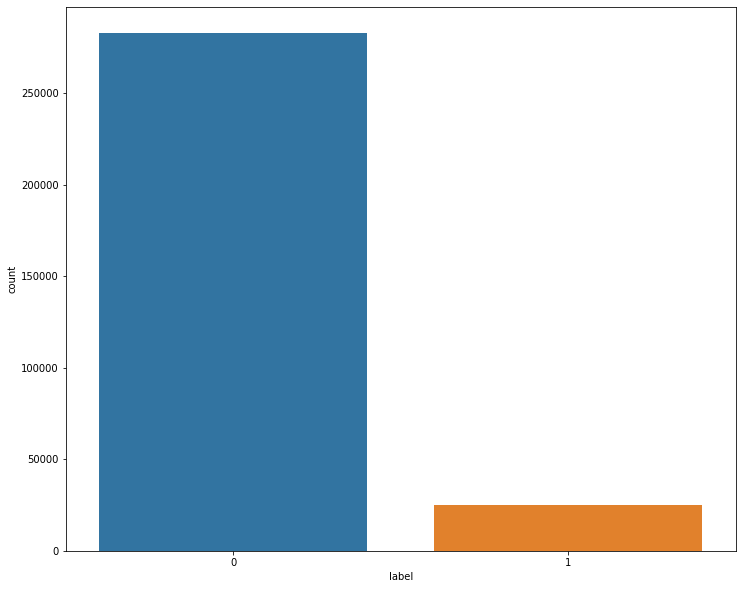

In [ ]:
# let's have a look at the distribution of our target variable:
# to make it look better, we first convert our spark df to a Pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_pd = data2.toPandas()
print(len(df_pd))
plt.figure(figsize=(12,10))
sns.countplot(x='label', data=df_pd, order=df_pd['label'].value_counts().index)

In [ ]:
# let's see how everything look in Pandas
import pandas as pd
pd.DataFrame(data2.take(10), columns= data2.columns)

,label,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,None,None,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,Cash loans,M,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,0,Cash loans,F,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,Ho

In [ ]:
## [Categorical and Numerical column] ##

# See how many categorical + numerical features:
cat_cols = [item[0] for item in data2.dtypes if item[1].startswith('string')] 
num_cols = [item[0] for item in data2.dtypes if item[1].startswith('int') | item[1].startswith('double')][1:]

print(str(len(cat_cols)) + '  categorical features')
print(str(len(num_cols)) + '  numerical features')

15  categorical features
104  numerical features


In [ ]:
## [Missing Values] ##

# we use the below function to find more information about the #missing values
def info_missing_table(df_pd):
    """Input pandas dataframe and Return columns with missing value and percentage"""
    mis_val = df_pd.isnull().sum() #count total of null in each columns in dataframe
#count percentage of null in each columns
    mis_val_percent = 100 * df_pd.isnull().sum() / len(df_pd) 
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) 
 #join to left (as column) between mis_val and mis_val_percent
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'}) 
#rename columns in table
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1) 
        
    print ("Your selected dataframe has " + str(df_pd.shape[1]) + " columns.\n"    #.shape[1] : just view total columns in dataframe  
    "There are " + str(mis_val_table_ren_columns.shape[0]) +              
    " columns that have missing values.") #.shape[0] : just view total rows in dataframe
    return mis_val_table_ren_columns
missings = info_missing_table(df_pd)
missings

Your selected dataframe has 120 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [ ]:
def count_missings(spark_df):
    null_counts = []        
    for col in spark_df.dtypes:    
        cname = col[0]     
        ctype = col[1]      
        nulls = spark_df.where( spark_df[cname].isNull()).count() #check count of null in column name
        result = tuple([cname, nulls])  #new tuple, (column name, null count)
        null_counts.append(result)      #put the new tuple in our result list
    null_counts=[(x,y) for (x,y) in null_counts if y!=0]  #view just columns that have missing values
    return null_counts

In [ ]:
miss_counts = count_missings(data2)
miss_counts

[('AMT_ANNUITY', 12),
 ('AMT_GOODS_PRICE', 278),
 ('NAME_TYPE_SUITE', 1292),
 ('OWN_CAR_AGE', 202929),
 ('OCCUPATION_TYPE', 96391),
 ('CNT_FAM_MEMBERS', 2),
 ('EXT_SOURCE_1', 173378),
 ('EXT_SOURCE_2', 660),
 ('EXT_SOURCE_3', 60965),
 ('APARTMENTS_AVG', 156061),
 ('BASEMENTAREA_AVG', 179943),
 ('YEARS_BEGINEXPLUATATION_AVG', 150007),
 ('YEARS_BUILD_AVG', 204488),
 ('COMMONAREA_AVG', 214865),
 ('ELEVATORS_AVG', 163891),
 ('ENTRANCES_AVG', 154828),
 ('FLOORSMAX_AVG', 153020),
 ('FLOORSMIN_AVG', 208642),
 ('LANDAREA_AVG', 182590),
 ('LIVINGAPARTMENTS_AVG', 210199),
 ('LIVINGAREA_AVG', 154350),
 ('NONLIVINGAPARTMENTS_AVG', 213514),
 ('NONLIVINGAREA_AVG', 169682),
 ('APARTMENTS_MODE', 156061),
 ('BASEMENTAREA_MODE', 179943),
 ('YEARS_BEGINEXPLUATATION_MODE', 150007),
 ('YEARS_BUILD_MODE', 204488),
 ('COMMONAREA_MODE', 214865),
 ('ELEVATORS_MODE', 163891),
 ('ENTRANCES_MODE', 154828),
 ('FLOORSMAX_MODE', 153020),
 ('FLOORSMIN_MODE', 208642),
 ('LANDAREA_MODE', 182590),
 ('LIVINGAPARTMENTS_MO

In [ ]:
# Separate categorical and numerical columns with missing values based on types

list_cols_miss=[x[0] for x in miss_counts]
df_miss= data2.select(*list_cols_miss)

# categorical columns
catcolums_miss=[item[0] for item in df_miss.dtypes if item[1].startswith('string')]  #will select name of column with string data type
print("cateogrical columns_miss:", catcolums_miss)

# numerical columns
numcolumns_miss = [item[0] for item in df_miss.dtypes if item[1].startswith('int') | item[1].startswith('double')] #will select name of column with integer or double data type
print("numerical columns_miss:", numcolumns_miss)

cateogrical columns_miss: ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
numerical columns_miss: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRA

In [ ]:
# Fill the missing values

In [ ]:
# (1) categorical --> the most frequent category

from pyspark.sql.functions import rank,sum,col
df_Nomiss=data2.na.drop()
for x in catcolums_miss:                  
    mode=df_Nomiss.groupBy(x).count().sort(col("count").desc()).collect()[0][0] 
    print(x, mode) #print name of columns and it's most categories 
    new_df = data2.na.fill({x:mode})

NAME_TYPE_SUITE Unaccompanied
OCCUPATION_TYPE Laborers
FONDKAPREMONT_MODE reg oper account
HOUSETYPE_MODE block of flats
WALLSMATERIAL_MODE Panel
EMERGENCYSTATE_MODE No


In [ ]:
# (2) numerical --> average value of each column

from pyspark.sql.functions import mean, round
for i in numcolumns_miss:
    meanvalue = data2.select(round(mean(i))).collect()[0][0] 
    print(i, meanvalue) 
    new_df=data2.na.fill({i:meanvalue})

AMT_ANNUITY 27109.0
AMT_GOODS_PRICE 538396.0
OWN_CAR_AGE 12.0
CNT_FAM_MEMBERS 2.0
EXT_SOURCE_1 1.0
EXT_SOURCE_2 1.0
EXT_SOURCE_3 1.0
APARTMENTS_AVG 0.0
BASEMENTAREA_AVG 0.0
YEARS_BEGINEXPLUATATION_AVG 1.0
YEARS_BUILD_AVG 1.0
COMMONAREA_AVG 0.0
ELEVATORS_AVG 0.0
ENTRANCES_AVG 0.0
FLOORSMAX_AVG 0.0
FLOORSMIN_AVG 0.0
LANDAREA_AVG 0.0
LIVINGAPARTMENTS_AVG 0.0
LIVINGAREA_AVG 0.0
NONLIVINGAPARTMENTS_AVG 0.0
NONLIVINGAREA_AVG 0.0
APARTMENTS_MODE 0.0
BASEMENTAREA_MODE 0.0
YEARS_BEGINEXPLUATATION_MODE 1.0
YEARS_BUILD_MODE 1.0
COMMONAREA_MODE 0.0
ELEVATORS_MODE 0.0
ENTRANCES_MODE 0.0
FLOORSMAX_MODE 0.0
FLOORSMIN_MODE 0.0
LANDAREA_MODE 0.0
LIVINGAPARTMENTS_MODE 0.0
LIVINGAREA_MODE 0.0
NONLIVINGAPARTMENTS_MODE 0.0
NONLIVINGAREA_MODE 0.0
APARTMENTS_MEDI 0.0
BASEMENTAREA_MEDI 0.0
YEARS_BEGINEXPLUATATION_MEDI 1.0
YEARS_BUILD_MEDI 1.0
COMMONAREA_MEDI 0.0
ELEVATORS_MEDI 0.0
ENTRANCES_MEDI 0.0
FLOORSMAX_MEDI 0.0
FLOORSMIN_MEDI 0.0
LANDAREA_MEDI 0.0
LIVINGAPARTMENTS_MEDI 0.0
LIVINGAREA_MEDI 0.0
NONLIVING

In [ ]:
#new_df.na.drop(how="any").show(truncate=False)

#new_df=new_df.na.drop()

In [ ]:
new_df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in new_df.columns]).show(truncate=False)

+-----+------------------+-----------+---------------+------------+----------------+----------+-----------+---------------+---------------+----------------+-------------------+------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+-----------------+------------+------------+------------+--------------+----------------+---------------------------+---------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+-----------------------+-----------------+---------------+-------------

let’s work on how to deal with the imbalanced classes. there are different methods to mitigate this problem. one way is to under sample the majority class or over sample the minority class to make a more balanced results. another way is to assign weights for each class to penalize the majority class by assigning less weight and boost the minority class by assigning bigger weight. we are going to create a new column in the dataset named “weights” and assign the inverse ratio of each class as weights. here is how it’s done:

In [ ]:
# adding the new column weights and fill it with ratios
from pyspark.sql.functions import when
ratio = 0.91
def weight_balance(labels):
    return when(labels == 1, ratio).otherwise(1*(1-ratio))
new_df = new_df.withColumn('weights', weight_balance(col('label')))

In [ ]:
pd.DataFrame(new_df.take(5), columns= new_df.columns)

,label,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,weights
0,0,Cash loans,M,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity Type 3,0.270766,...,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.09
1,0,Cash loans,F,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Self-employed,0.647045,...,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.09
2,0,Cash loans,F,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,0.674832,...,0.7317,0.2213,0.7892,reg oper account,block of flats,0.7334,Monolithic,No,0.0,0.0,0.0,0.0,-1792.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,0.09
3,0,Cash loans,M,N,0,162000.0,263686.5,24781.5,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.022625,-13972,-4472,-464.0,-4529,3.0,1,1,0,1,1,0,Laborers,2.0,2,2,THURSDAY,16,0,0,0,0,0,0,Government,0.534999,...,0.3628,0.0000,0.0172,reg oper account,block of flats,0.4064,Panel,No,5.0,0.0,5.0,0.0,-1161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.09
4,1,Cash loans,M,N,1,225000.0,1019205.0,31032.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-11356,-602,-335.0,-3224,9.0,1,1,0,1,0,0,Laborers,2.0,1,1,MONDAY,14,1,0,1,0,0,0,Business Entity Type 3,0.262005,...,0.2310,0.0078,0.0077,reg oper account,block of flats,0.1874,Panel,No,3.0,0.0,3.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,0.91


3. Feature Engineering
PySpark has a great feature engineering handling, so that we do not need to do much for extracting features

Apply StringIndexer() to assign indices to each category in our categorical columns
Apply OneHotEncoderEstimator() to convert categorical columns to onehot encoded vectors
Apply VectorAssembler() to create a feature vector from all categorical and numerical features and we call the final vector as “features”

In [ ]:
# we use the OneHotEncoderEstimator from MLlib in spark to convert #aech v=categorical feature into one-hot vectors
# next, we use VectorAssembler to combine the resulted one-hot ector #and the rest of numerical features into a 
# single vector column. we append every step of the process in a #stages array
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
stages = []
for categoricalCol in cat_cols:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
    
assemblerInputs = [c + "classVec" for c in cat_cols] + num_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]


Let’s put everything into a pipeline. here we are performing a sequence of transformations so we do all of them at once using a pipeline:

In [ ]:
from pyspark.ml import Pipeline
cols = new_df.columns
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(new_df)
new_df = pipelineModel.transform(new_df)

In [ ]:
selectedCols = ['features']+cols
new_df = new_df.select(selectedCols)



In [ ]:
# New dataset after feature engineering:
pd.DataFrame(new_df.take(5), columns=new_df.columns)

,features,label,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,weights
0,"(1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,Cash loans,M,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity Type 3,...,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.09
1,"(1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,Cash loans,F,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Self-employed,...,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.09
2,"(1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,Cash loans,F,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,...,0.7317,0.2213,0.7892,reg oper account,block of flats,0.7334,Monolithic,No,0.0,0.0,0.0,0.0,-1792.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,0.09
3,"(1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,Cash loans,M,N,0,162000.0,263686.5,24781.5,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.022625,-13972,-4472,-464.0,-4529,3.0,1,1,0,1,1,0,Laborers,2.0,2,2,THURSDAY,16,0,0,0,0,0,0,Government,...,0.3628,0.0000,0.0172,reg oper account,block of flats,0.4064,Panel,No,5.0,0.0,5.0,0.0,-1161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.09
4,"(1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,Cash loans,M,N,1,225000.0,1019205.0,31032.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-11356,-602,-335.0,-3224,9.0,1,1,0,1,0,0,Laborers,2.0,1,1,MONDAY,14,1,0,1,0,0,0,Business Entity Type 3,...,0.2310,0.0078,0.0077,reg oper account,block of flats,0.1874,Panel,No,3.0,0.0,3.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,0.91


In [ ]:
# split the data into trainign and testin sets
train, test = new_df.randomSplit([0.80, 0.20], seed = 42)
print(train.count())
print(test.count())

# first we check how LogisticRegression perform 
from pyspark.ml.classification import LogisticRegression
LR = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=15)
LR_model = LR.fit(train)

6938
1664


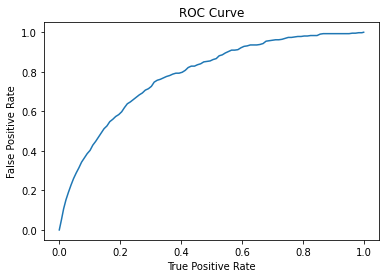

Training set ROC: 0.7812550227209631


In [ ]:
#plotting the ROC Curve
trainingSummary = LR_model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set ROC: ' + str(trainingSummary.areaUnderROC))

In [ ]:
# checking on the testing set

In [ ]:
#Logistic Regression

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions_LR = LR_model.transform(test)
evaluator = BinaryClassificationEvaluator()
print("Test SET ROC: " + str(evaluator.evaluate(predictions_LR, {evaluator.metricName: "areaUnderROC"})))

Test SET ROC: 0.6675164095235786


In [ ]:
#(2) Gradient Boosting

In [ ]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=15)
GBT_Model = gbt.fit(train)
gbt_predictions = GBT_Model.transform(test)
evaluator = BinaryClassificationEvaluator()

In [ ]:
print("Test SET ROC: " + str(evaluator.evaluate(gbt_predictions, {evaluator.metricName: "areaUnderROC"})))

Test SET ROC: 0.6569137985322255


In [ ]:
#Let's use the Gradient Boosting result then apply hyper-parameter tuning using grid search and after that we run cross validation to better improve the performance of GBT.

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 30])
             .addGrid(gbt.maxIter, [10, 15])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.
cvModel = cv.fit(train)
gbt_cv_predictions = cvModel.transform(test)
evaluator.evaluate(gbt_cv_predictions)

0.6682672511928694